https://chatgpt.com/c/67f42632-1ae8-8003-9e7d-7a99edf1470b

/tmp/ipykernel_320186/3371858989.py:16: RuntimeWarning: divide by zero encountered in divide
  P_k = 1 / k_abs**2


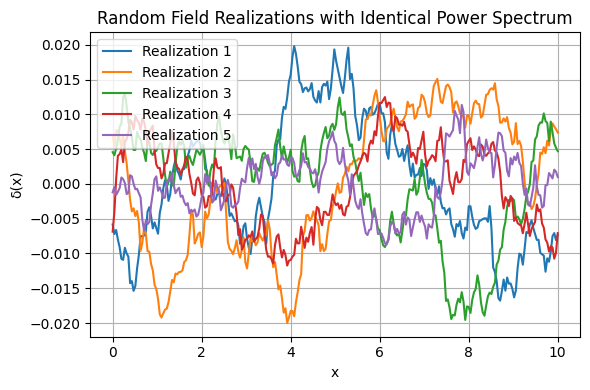

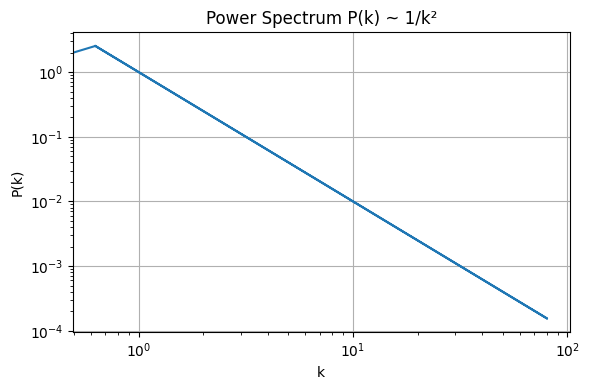

In [24]:
# Re-import necessary libraries after kernel reset
import numpy as np
import matplotlib.pyplot as plt

# Parameters
N = 256  # Number of points in the field
L = 10.0  # Physical size of the box
num_realizations = 5  # How many field realizations to generate

# Wavenumber array
k = np.fft.fftfreq(N, d=L/N) * 2 * np.pi
k_abs = np.abs(k)
k[0] = 1e-10  # avoid division by zero

# Define power spectrum: P(k) ~ 1/k^2 (scale-invariant-like in 1D)
P_k = 1 / k_abs**2
P_k[0] = 0  # remove DC component for visualization

# Generate random field realizations
fields = []
for _ in range(num_realizations):
    random_phases = np.exp(2j * np.pi * np.random.rand(N))
    amplitudes = np.sqrt(P_k)
    delta_k = amplitudes * random_phases
    field = np.fft.ifft(delta_k).real
    fields.append(field)

# Plot the field realizations
x = np.linspace(0, L, N)
plt.figure(figsize=(6, 4))
for i, field in enumerate(fields):
    plt.plot(x, field, label=f"Realization {i+1}")
plt.title("Random Field Realizations with Identical Power Spectrum")
plt.xlabel("x")
plt.ylabel("δ(x)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot the power spectrum
plt.figure(figsize=(6, 4))
plt.loglog(k_abs, P_k)
plt.title("Power Spectrum P(k) ~ 1/k²")
plt.xlabel("k")
plt.ylabel("P(k)")
plt.grid(True)
plt.tight_layout()
plt.show()


/tmp/ipykernel_320186/3761177047.py:17: RuntimeWarning: divide by zero encountered in divide
  P_k = (1 / k_abs**2) * np.exp(-k_abs/k_cutoff)


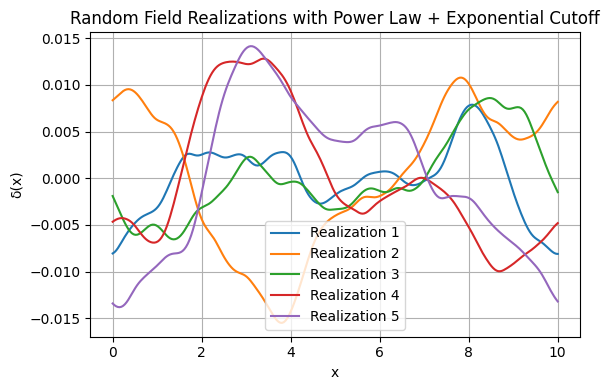

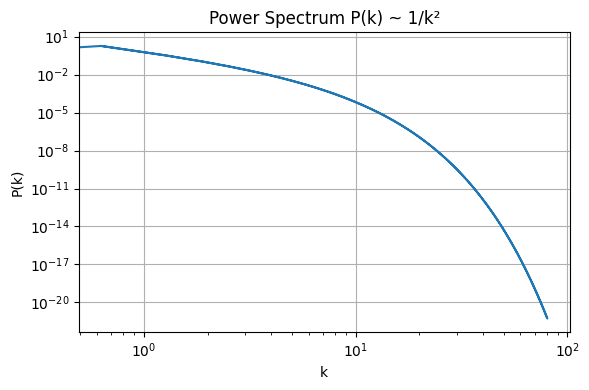

In [23]:
# Re-import necessary libraries after kernel reset
import numpy as np
import matplotlib.pyplot as plt

# Parameters
N = 256  # Number of points in the field
L = 10.0  # Physical size of the box
num_realizations = 5  # How many field realizations to generate
k_cutoff = 2.0  # Cutoff scale for exponential dropoff

# Wavenumber array
k = np.fft.fftfreq(N, d=L/N) * 2 * np.pi
k_abs = np.abs(k)
k[0] = 1e-10  # avoid division by zero

# Define power spectrum: P(k) ~ 1/k^2 with exponential cutoff
P_k = (1 / k_abs**2) * np.exp(-k_abs/k_cutoff)
P_k[0] = 0  # remove DC component for visualization

# Generate random field realizations
fields = []
for _ in range(num_realizations):
    random_phases = np.exp(2j * np.pi * np.random.rand(N))
    amplitudes = np.sqrt(P_k)
    delta_k = amplitudes * random_phases
    field = np.fft.ifft(delta_k).real
    fields.append(field)

# Plot the field realizations
x = np.linspace(0, L, N)
plt.figure(figsize=(6, 4))
for i, field in enumerate(fields):
    plt.plot(x, field, label=f"Realization {i+1}")
plt.title("Random Field Realizations with Power Law + Exponential Cutoff")
plt.xlabel("x")
plt.ylabel("δ(x)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot the power spectrum
plt.figure(figsize=(6, 4))
plt.loglog(k_abs, P_k)
plt.title("Power Spectrum P(k) ~ 1/k²")
plt.xlabel("k")
plt.ylabel("P(k)")
plt.grid(True)
plt.tight_layout()
plt.show()


/tmp/ipykernel_320186/784921118.py:3: RuntimeWarning: divide by zero encountered in power
  P_k_primordial = k_abs**(n_s - 1)


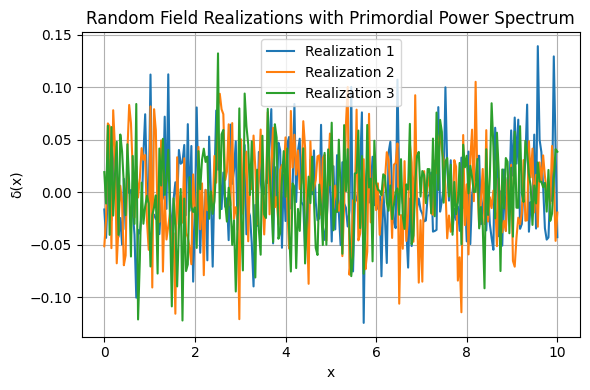

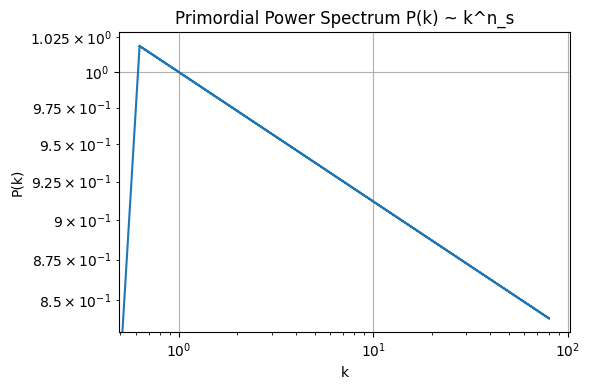

In [35]:
# Define primordial power spectrum: P(k) ~ k^n_s with n_s = 0.96
n_s = 0.96
P_k_primordial = k_abs**(n_s - 1)
P_k_primordial[0] = 0  # remove DC component for visualization

num_realizations = 3

# Generate random field realizations using primordial power spectrum
fields_primordial = []
for _ in range(num_realizations):
    random_phases = np.exp(2j * np.pi * np.random.rand(N))
    amplitudes = np.sqrt(P_k_primordial)
    delta_k = amplitudes * random_phases
    field = np.fft.ifft(delta_k).real
    fields_primordial.append(field)

# Plot the field realizations using primordial power spectrum
plt.figure(figsize=(6, 4))
for i, field in enumerate(fields_primordial):
    plt.plot(x, field, label=f"Realization {i+1}")
plt.title("Random Field Realizations with Primordial Power Spectrum")
plt.xlabel("x")
plt.ylabel("δ(x)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot the primordial power spectrum
plt.figure(figsize=(6, 4))
plt.loglog(k_abs, P_k_primordial)
plt.title("Primordial Power Spectrum P(k) ~ k^n_s")
plt.xlabel("k")
plt.ylabel("P(k)")
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Goal: generate 1D field samples that match a target histogram (mean and variance)
np.random.seed(42)

# Step 1: Define the target distribution (e.g., Gaussian with specific mean and variance)
target_mean = 0.0
target_std = 1.5
target_distribution = lambda size: np.random.normal(loc=target_mean, scale=target_std, size=size)

# Step 2: Maximum entropy under constraints: assume P(x) ~ exp(-lambda1 * x - lambda2 * x^2)
# This corresponds to matching mean and variance (i.e., max entropy under known first two moments)

# Step 3: Sample from this using Metropolis-Hastings
def metropolis_sampler(num_samples, lambda1, lambda2, proposal_width=1.0):
    samples = [0.0]  # start from 0
    for _ in range(num_samples - 1):
        current = samples[-1]
        proposal = np.random.normal(current, proposal_width)
        
        # Log-probability under max-entropy distribution
        log_p_current = -lambda1 * current - lambda2 * current**2
        log_p_proposal = -lambda1 * proposal - lambda2 * proposal**2
        
        # Metropolis acceptance
        if np.log(np.random.rand()) < log_p_proposal - log_p_current:
            samples.append(proposal)
        else:
            samples.append(current)
    return np.array(samples)

# Set lambda parameters to match mean=0, std=1.5 approximately (empirically tuned)
lambda1 = 0.0
lambda2 = 1 / (2 * target_std**2)

# Generate samples
num_samples = 10000
samples_target = target_distribution(num_samples)
samples_me = metropolis_sampler(num_samples, lambda1, lambda2)

# Plot histograms
plt.figure(figsize=(10, 5))
plt.hist(samples_target, bins=50, density=True, alpha=0.6, label="Target Gaussian (mean=0, std=1.5)")
plt.hist(samples_me, bins=50, density=True, alpha=0.6, label="Max-Entropy Samples")
plt.legend()
plt.title("Max-Entropy Sampling with Mean and Variance Constraints")
plt.xlabel("x")
plt.ylabel("Probability Density")
plt.grid(True)
plt.tight_layout()
plt.show()
